In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.Load the data to python environment**

In [2]:
titanic_data=pd.read_csv('/content/titanic_dataset.csv')
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2.Make ‘PassengerId’ as the index column**

In [3]:
titanic_data=titanic_data.set_index('PassengerId')

In [4]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Check the basic details of the dataset**

In [5]:
##info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
##Number of missing values
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

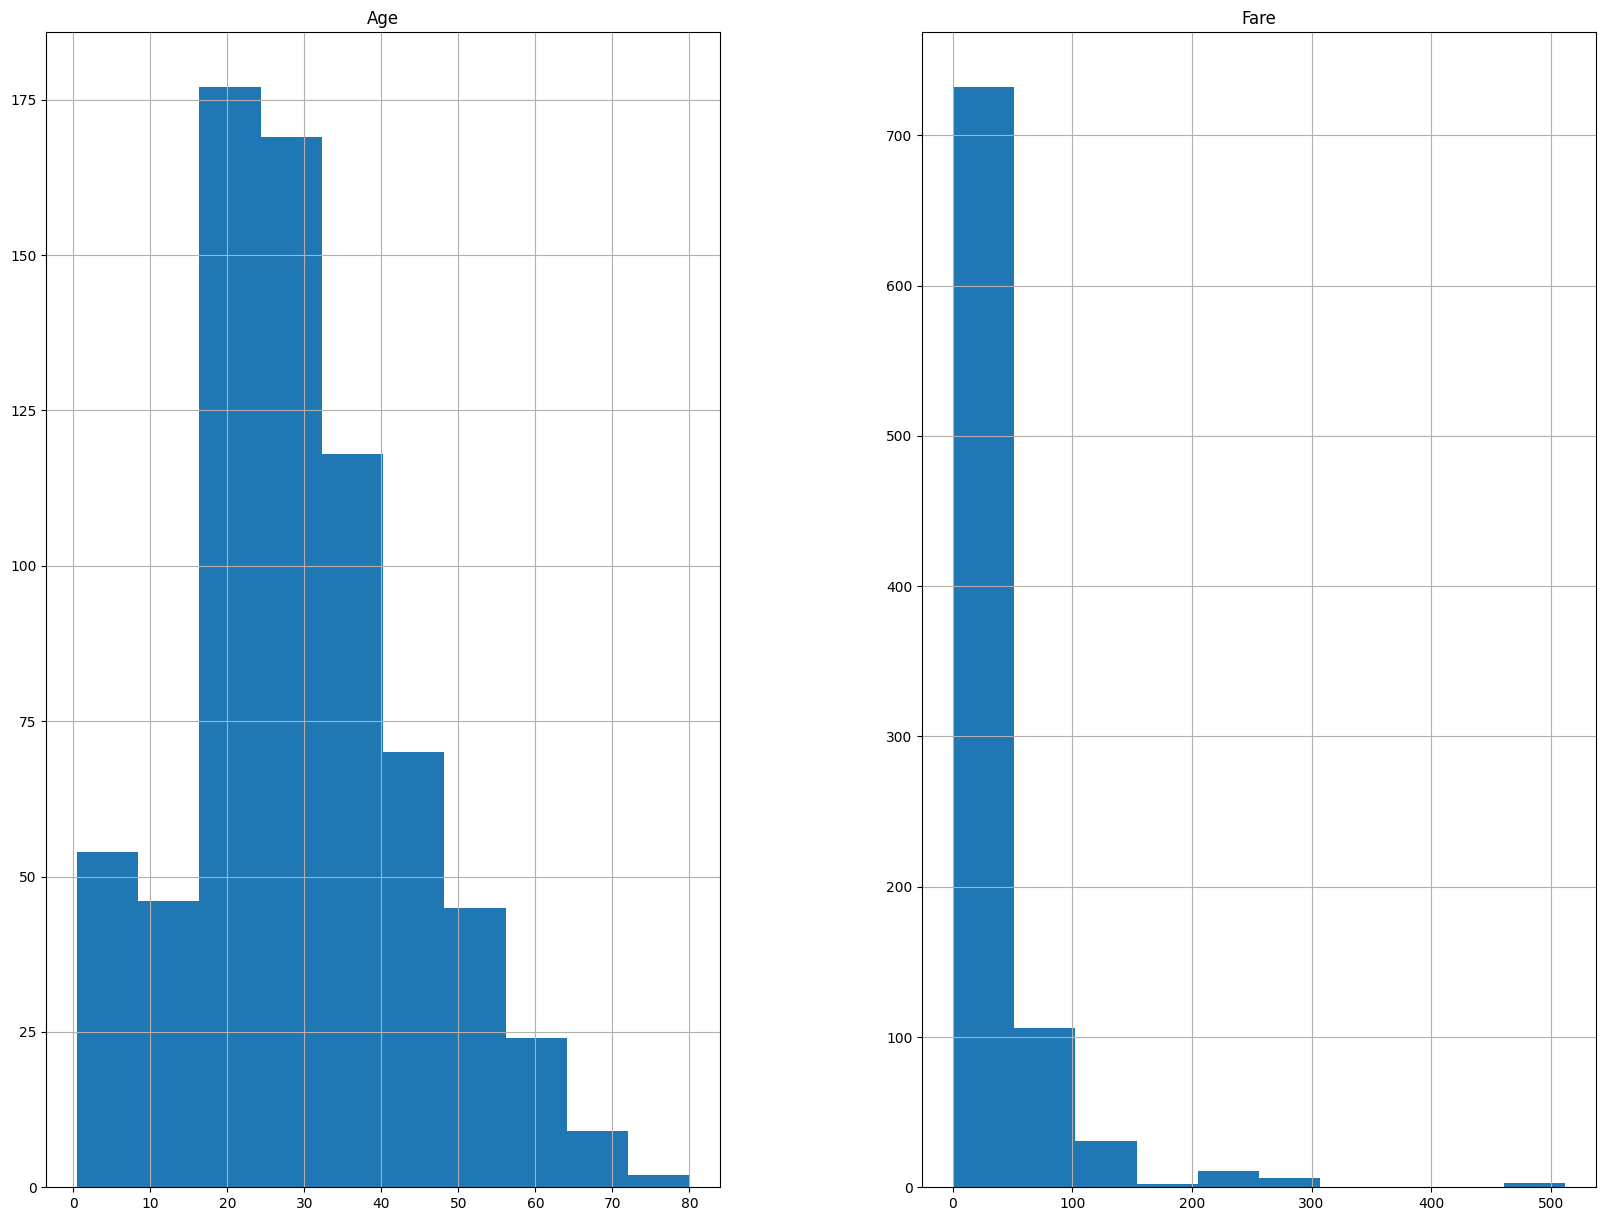

In [7]:
##ploting the data
freqgraph=titanic_data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

**4. Fill in all the missing values present in all the columns in the dataset**

In [8]:
##filling missing values
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean()) ##if data is normally distributed use mean to fill NaN
titanic_data['Fare']=titanic_data['Fare'].fillna(titanic_data['Fare'].median()) ##if data is skewed use median to fill NaN
titanic_data['Cabin']=titanic_data['Cabin'].fillna(titanic_data['Cabin'].mode()[0]) ##if data is object type use mode to fill NaN
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0]) ##if data is object type use mode to fill NaN
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**

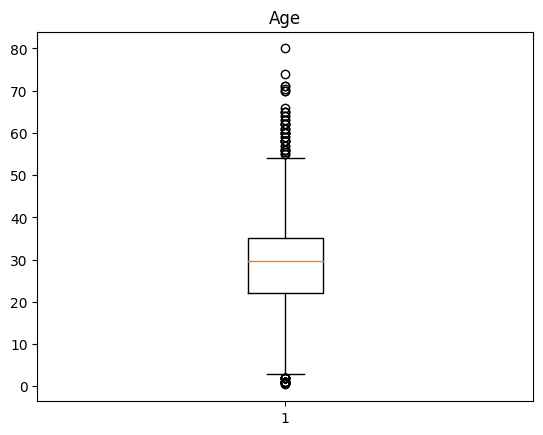

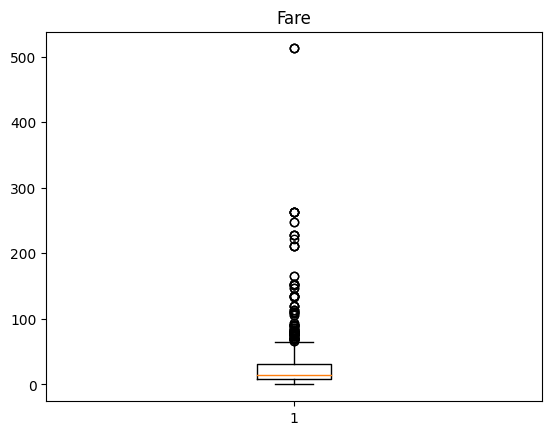

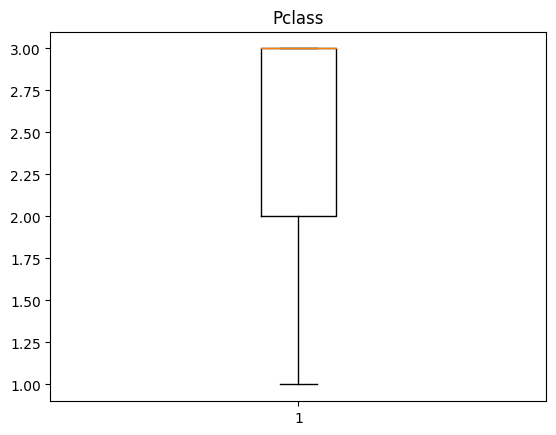

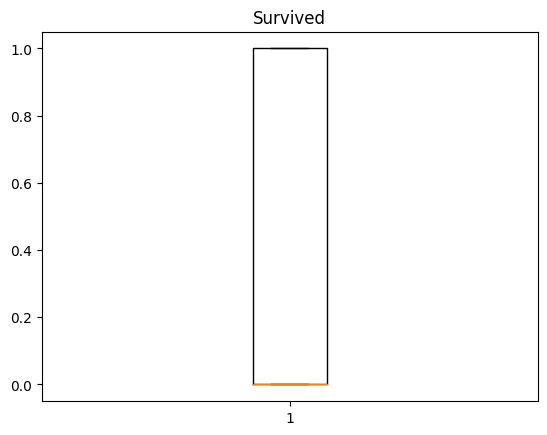

In [10]:
num_columns=['Age','Fare','Pclass','Survived']
for i in num_columns:
  plt.figure()
  plt.boxplot(titanic_data[i])
  plt.title(i)

In [11]:
##column Age

Q1=np.percentile(titanic_data['Age'],25,method='midpoint')
Q2=np.percentile(titanic_data['Age'],50,method='midpoint')
Q3=np.percentile(titanic_data['Age'],75,method='midpoint')
print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)

Q1 is: 22.0
Q2 is: 29.69911764705882
Q3 is: 35.0


In [13]:
##Inter quartile range
IQR=Q3-Q1
print(IQR)

13.0


In [15]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit :",low_lim)
print("upper limit:",up_lim)

lower limit : 2.5
upper limit: 54.5


In [16]:
outliers=[]
for x in titanic_data['Age']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [17]:
titanic_data['Age']=titanic_data['Age'].clip(lower=low_lim,upper=up_lim)

In [18]:
outliers=[]
for x in titanic_data['Age']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

[]


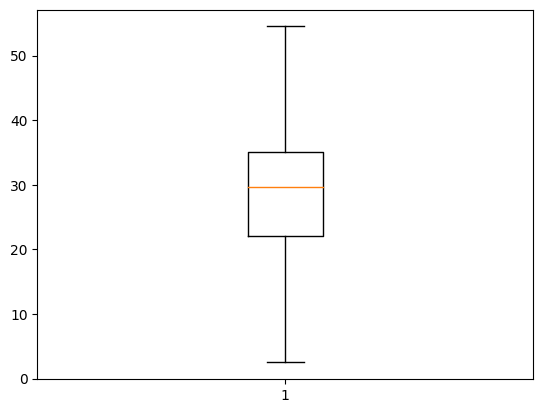

In [19]:
##box plot
plt.boxplot(titanic_data['Age'])
plt.show()

In [20]:
## Column Fare

Q1=np.percentile(titanic_data['Fare'],25,method='midpoint')
Q2=np.percentile(titanic_data['Fare'],50,method='midpoint')
Q3=np.percentile(titanic_data['Fare'],75,method='midpoint')
print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)

Q1 is: 7.9104
Q2 is: 14.4542
Q3 is: 31.0


In [21]:
##Inter quartile range
IQR=Q3-Q1
print(IQR)

23.0896


In [22]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit :",low_lim)
print("upper limit:",up_lim)

lower limit : -26.724
upper limit: 65.6344


In [23]:
outliers=[]
for x in titanic_data['Fare']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [24]:
titanic_data['Fare']=titanic_data['Fare'].clip(lower=low_lim,upper=up_lim)

In [25]:
outliers=[]
for x in titanic_data['Fare']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

[]


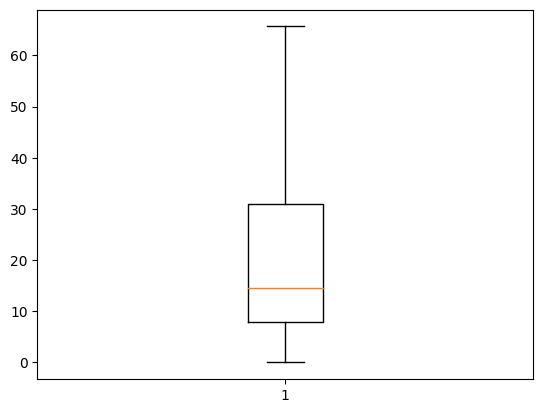

In [26]:
##box plot
plt.boxplot(titanic_data['Fare'])
plt.show()

**6.Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [30]:
titanic_data['Pclass'].unique()

array([3, 1, 2])

In [32]:
titanic_data['Ticket'].nunique()

681

In [33]:
titanic_data['Cabin'].nunique()

147

In [38]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
##Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
for i in ['Sex','Pclass','Ticket','Cabin','Embarked']:
  titanic_data[i]=le.fit_transform(titanic_data[i])


In [45]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,47,2
2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,65.6344,81,0
3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,47,2
4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,47,2


In [47]:
X=titanic_data[['Age','Fare']]

In [49]:
X.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.376817,24.046813
std,12.062035,20.481625
min,2.500000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,54.500000,65.634400


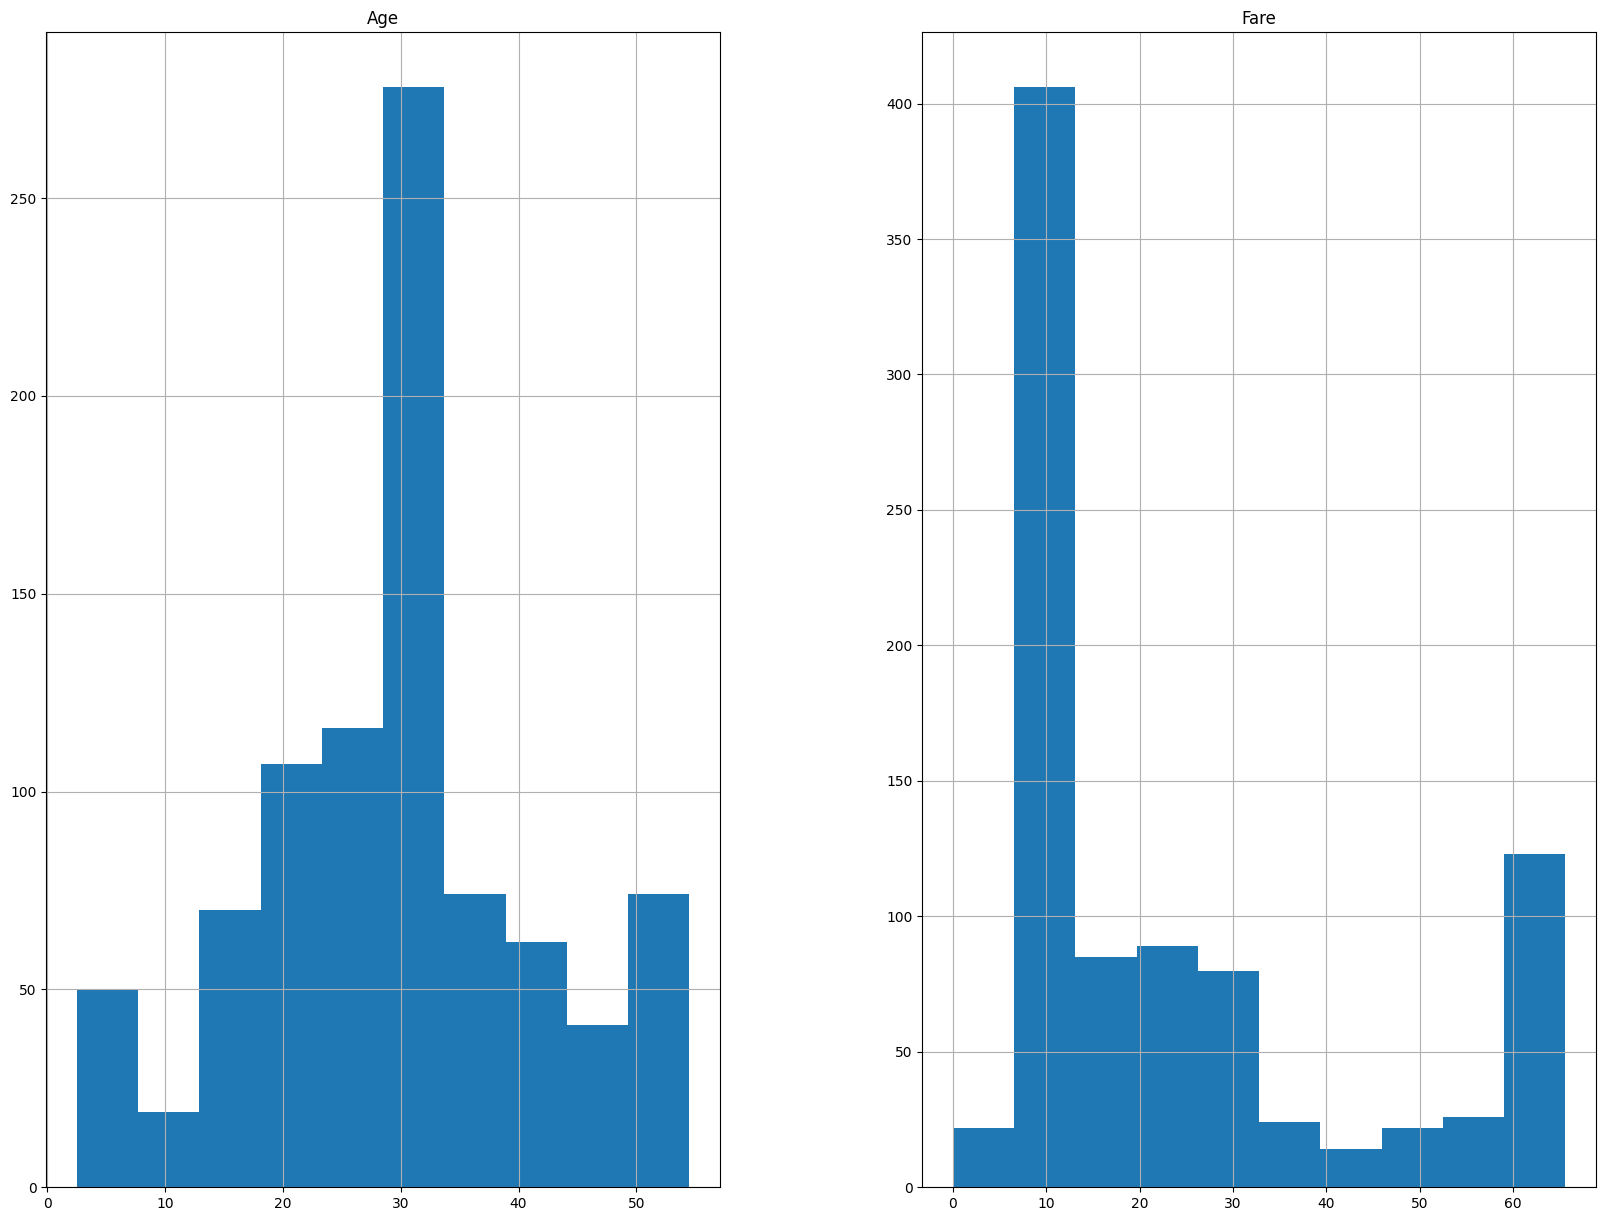

In [52]:
##Histogram
X.hist(figsize=(20,15))
plt.show()

In [51]:
##Min -Max scaling
from sklearn.preprocessing import MinMaxScaler
mimmax=MinMaxScaler()
X_mn=mimmax.fit_transform(X)
X_mn=pd.DataFrame(X_mn)
X_mn.describe()

,0,1
count,891.000000,891.000000
mean,0.516862,0.366375
std,0.231962,0.312056
min,0.000000,0.000000
25%,0.375000,0.120522
50%,0.523060,0.220223
75%,0.625000,0.472313
max,1.000000,1.000000


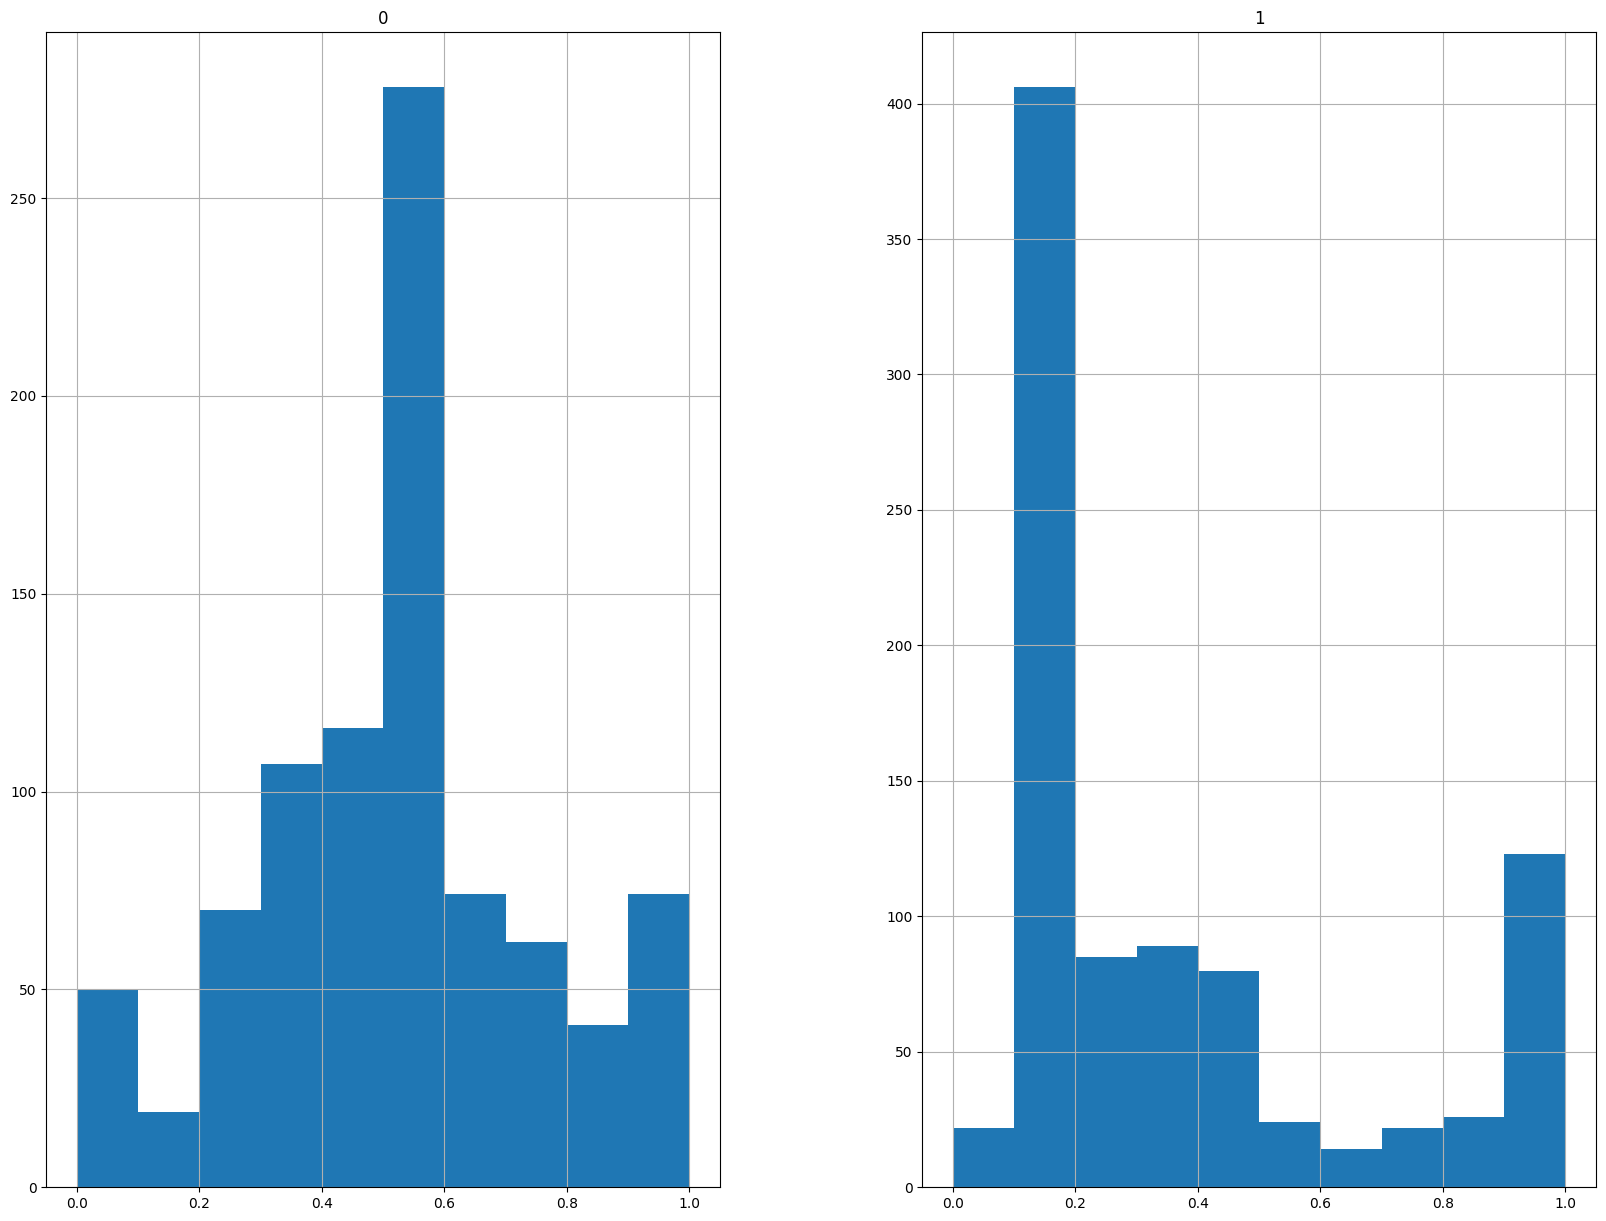

In [54]:
##Histogram
X_mn.hist(figsize=(20,15))
plt.show()
